# 5. Programmierübung: SciPy

<div style="display:flex;">
    <div style="text-align: left">
        Willkommen zur fünften Programmierübung Einführung in Python 3.
    </div>
    <img style="float: right; margin: 0px 15px 15px 0px" src="https://www.python.org/static/img/python-logo-large.c36dccadd999.png?1576869008" width="100" />
</div>

Wenn Sie Fragen oder Verbesserungsvorschläge zum Inhalt oder Struktur der Notebooks haben, dann können sie eine E-Mail an Phil Keier ([p.keier@hbk-bs.de](mailto:p.keier@hbk-bs.de?subject=[SigSys]%20Feedback%20Programmierübung&amp)) oder Martin Le ([martin.le@tu-bs.de](mailto:martin.le@tu-bs.de?subject=[SigSys]%20Feedback%20Programmierübung&amp)) schreiben.

Link zu einem Python Spickzettel: [hier](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PythonForDataScience.pdf)

Der Großteil des Python-Tutorials stammt aus der Veranstaltung _Deep Learning Lab_ und von [www.python-kurs.eu](https://www.python-kurs.eu/python3_kurs.php) und wurde für _Signale und Systeme_, sowie _Einführung in die Programmierung für Nicht Informatiker_ angepasst.

---

# Was ist SciPy

SciPy steht für Scientific Python und ist eine Open-Source-Bibliothek, die auf der bewährten Architektur von NumPy aufbaut. Sie bietet eine Vielzahl von Funktionen, die speziell für ingenieurtechnische und wissenschaftliche Anwendungen entwickelt wurden. In diesem Zusammenhang möchten wir uns insbesondere mit Teilen des Statistikmoduls von SciPy vertraut machen.

__Für dieses Notebook schauen Sie bitte in die [SciPy Docs](https://docs.scipy.org/doc/scipy/tutorial/index.html)!!!__ Dort sind alle Funktionen beschrieben die wir hier bearbeiten und noch mehr!

---

SciPys wird meist als `sp` importiert da für diese Aufgabe nur das Statistik modul nötig ist wird einfach dieses importiert. Aufgrund des kurzen schlüssigen namens findet keine umbenennung statt:

In [4]:
from scipy import stats

---

# Lineare Regression

## Mathematische Definition

Ausgehend von dem stochastischen Zusammenhang: $$Y = f(X) + \epsilon$$
Hierfür gilt: 
- $Y$ ist die abhängige Variable, auch `Outcome`
- $X$ die unabhängige Variable, auch `Covariant`
- $\epsilon$ der Fehler, auch `random Noise`

Für $\epsilon$ wird angenommen, dass der erwartete Durschnitt gleich 0 ist $E(\epsilon)=0$. Das bedeutet, dass die Verteilung des Fehlers zum erwarteten Wert bei genügend Datenpunkten sich gegenseitig aufheben: $$\lim_{\epsilon\rightarrow\infty} f(x_\epsilon) = 0;\quad x \in X$$
Auch wird angenommen, dass die Varianz der Fehler $\epsilon$ konstant ist. $$Var(\epsilon) = \sigma^2$$
## Motivation

Die **lineare Regression** ist eine grundlegende Methode zur Modellierung von Beziehungen zwischen Variablen. Sie hilft, Zusammenhänge zu verstehen und ermöglicht Vorhersagen auf Basis vorhandener Daten. Durch die Bestimmung einer linearen Beziehung zwischen einer abhängigen und einer oder mehreren unabhängigen Variablen können wir Trends identifizieren und zukünftige Werte schätzen. Ihre Einfachheit, Effizienz und die Möglichkeit, auch bei großen Datensätzen präzise Ergebnisse zu erzielen, machen sie zu einem wertvollen Werkzeug in der Datenanalyse und ein Fundament für komplexere Modelle.

Dafür geht man davon aus, dass es zwei unabhängige Variablen $x_1$ & $x_2$ gibt, für die eine Zukünftige Aussage getätigt werden soll. Hierfür wird eine fehlerminimierte Gerade $g(x)$ zwischen die Datenpunkte gelegt. Daraus resultierenden lässt sich mit $g(x)$ eine zukünftige Vorhersage in einem bestimmten Fehlerbereich tätigen.

Aus der Schule sollte die Geraden Gleichung $g(x) = m\cdot x+b$ bekannt sein. Dabei beschreibt $m$ die Steigung (Slope) & $b$ den Schnittpunkt mit der y-Achse (interception). Die **lineare regression** bietet daher die Möglichkeit diese beiden Parameter herauszufinden.

Für das folgende Beispiel werden zwei (pseudo-)zufällig erzeugte Datensets generiert, auf welche dann die lineare regression angewandt wird. 

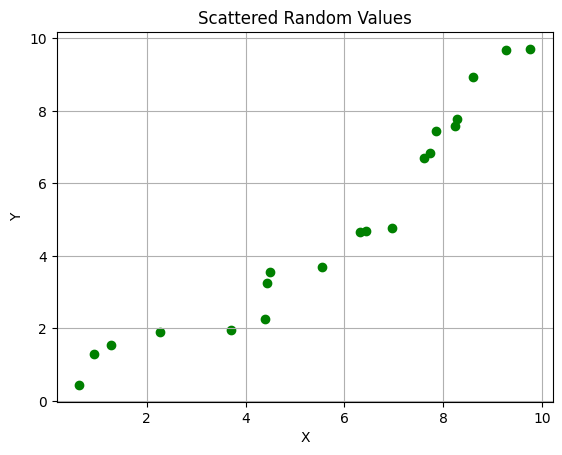

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rand = np.random.default_rng(42) # RNG with fixed seed

# Generate, Scale, round and sort random numbers for an increasing slope
scalar: int = 10
x: np.array = np.round(np.sort(rand.random(20) * scalar), decimals=2)
y: np.array = np.round(np.sort(rand.random(20) * scalar), decimals=2)

# Plot these values
plt.title("Scattered Random Values")
plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x,y, color='g')
plt.show()

Aus den erzeugten Daten ist klar ersichtlich, dass diese einem Trend folgen. Mittels SciPy wollen wir diesen Trend darstellen.

Dazu wird die Funktion `linregress` verwendet. Diese verlangt, wie aus der [Dokumentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress) zu entnehmen, zwei arrays mit Daten. 

Die Ausgabe ist aufgespalten in 5 Parameter:
- slope: die Steigung `m` der Geraden
- intercept: der Punkt an dem die Gerade die y-Achse trifft oder das `b`
- rvalue: der Pearson Korrelations Koefficient, welcher voerst ignoriert wird
- pvalue: der p-Wert das die Nullhypothese stimmt, wird auch ignoriert
- stderr: der Standard Error der Steigung, unter der Annahme einer Normalverteilung der Daten *(PCGs sind Normalverteilt)*

In [50]:
slope, intercept, _, _, stderr = stats.linregress(x,y)
print(f"Slope: {slope}\nIntercept: {intercept}\nStd Err: {stderr}")

Slope: 0.00011705479307062861
Intercept: 0.12499266634828204
Std Err: 0.002148109946128207


Aus `slope` & `intercept` lässt sich folglich eine Gerade definieren:

In [45]:
def line(x: float) -> float:
    '''
    Evaluates the rounded line from the previous
    evaluated linear regression model

    Note: Output rounded to 2 decimal places
    '''
    res: float = slope * x + intercept
    rounded: np.float64 = np.round(res, decimals=2)
    return float(rounded)

Diese kann über den gesamten bereich dargestellt werden. Dazu werden die bereits bekannten x-Werte verwendet:

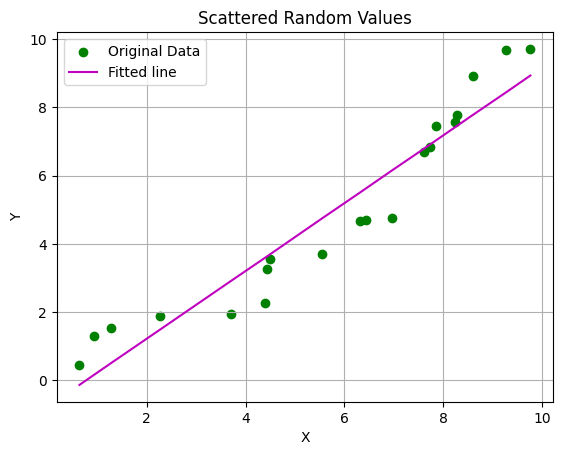

In [7]:
# Calculate the Line using vectorization
regline: np.array = np.vectorize(line)(x)

# Plot tvalues
plt.title("Scattered Random Values")
plt.grid()

plt.xlabel("X")
plt.ylabel("Y")

plt.scatter(x,y, color='g', label="Original Data")
plt.plot(x, regline, color='m', label="Fitted line")

plt.legend()

plt.show()

Mit diesem Model lässt sich dementsprechend die "Zukunft" vorhersagen. Hierfür können wir im folgenden einfach die Werte für `-1` & `11` berechnen und diese dem Plot hinzufügen:

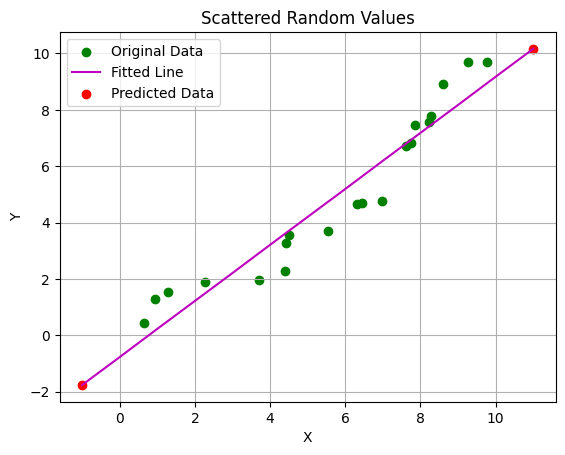

In [8]:
# Future Values
fut: np.array = np.array([line(-1), line(11)])

# Calculate extended Line using vectorization
ext_range: np.array = np.arange(-1,12)
regline: np.array = np.vectorize(line)(ext_range)

# Plot values
plt.title("Scattered Random Values")
plt.grid()

plt.xlabel("X")
plt.ylabel("Y")

plt.scatter(x,y, color='g', label="Original Data")
plt.plot(ext_range, regline, color='m', label="Fitted Line")
plt.scatter((-1, 11), fut, color='r', label="Predicted Data")

plt.legend()

plt.show()

Wie zu erwarten liegen beide Werte auf der Geraden.

Um deren Werte zu ermitteln lassen sich diese mittels print einfach ausgeben, dies sollte immer mit Angabe des Standard Errors erfolgen. Sonst ist unklar wie genau die Daten sind:

In [9]:
print("Prediction of f(11) = {}, with standard deviation {}".format(line(11), np.round(stderr, decimals=2)))

Prediction of f(11) = 10.16, with standard deviation 0.07


### Aufgabe

*7 Punkte*

Bestimme mittels Linearer Regression die *best fit* Funktion für die beiden gegebenen Datensets `x_data` & `y_data`, unter beachtung folgender Punkte:

- Plotte das Ergebnis angemessen
- Nutze SciPys `linregress` Funktion, speichere den Output vor dem entpacken in der Variablen `l`
- Definiere die Funktion `reg_line` mit einem Eingabeparameter
- Bestimme die Werte für `-0.3` & `3.4` speichere diese als liste in variablen `future`

Markdown Zeile (0 Punkte bei nicht beantworten):
- Erkläre die berechneten Werte `slope`, `intercept` & `stderr` in eigenen Worten und setze diese in den Kontext stochastischer Analytik.
- Interpretiere den resultierenden Plot nutze hierfür gerne Reale Beispiele.

In [39]:
import numpy as np
random = np.random.default_rng(420)

# two scuffed up One-Liners :)
x_data: np.array = np.sort(np.round(random.random(40)*np.pi, decimals=2))
y_data: np.array = np.flip(np.sort(np.round(random.random(40)*np.sqrt(2), decimals=2)))

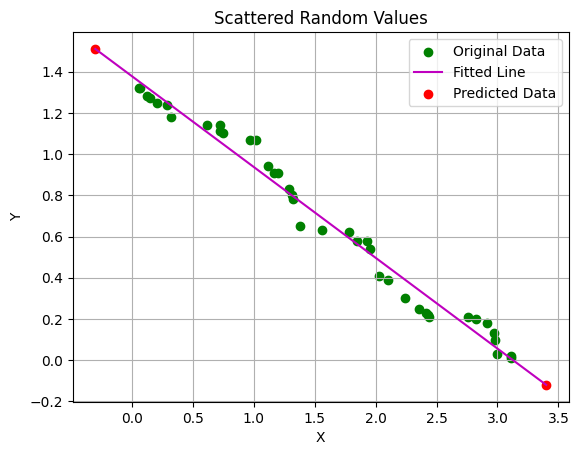

In [59]:
# BEGIN SOLUTION
slope, intercept, _, _, stderr = stats.linregress(x_data,y_data)

def reg_line(x: float) -> float:
    return float(np.round(slope*x+intercept,decimals=2))

ext: tuple = (-0.3, 3.4)
rl: np.array = np.vectorize(reg_line)(ext)

future: list = [reg_line(x) for x in ext]
# Plot values
plt.title("Scattered Random Values")
plt.grid()

plt.xlabel("X")
plt.ylabel("Y")

plt.scatter(x_data,y_data, color='g', label="Original Data")
plt.plot(ext, rl, color='m', label="Fitted Line")
plt.scatter(ext, future, color='r', label="Predicted Data")

plt.legend()

plt.show()
# END SOLUTION

# BEGIN SOLUTION
# END SOLUTION

In [60]:
# Hier werden ihre Lösungen getestet

# Check if reg_line is defined
assert 'reg_line' in dir()

# Check if reg_line gives right output
assert reg_line(10) == -3.04

# Check if future values are calculated right
assert future == [1.51, -0.12]

### BEGIN HIDDEN TESTS
sl, ip, _, _, se = stats.linregress(x_data,y_data)
slope, intercept, _, _, stderr = l

assert slope == sl
assert intercept == ip
assert stderr == se

### END HIDDEN TESTS

### Aufgabe

*15 Punkte*

Gegeben ist die Geburtenzahl insgesamt der Stadt Braunschweig `geburten_bs`. (Quelle: [Landesamt für Statistik Niedersachsen (LSN)](https://www.braunschweig.de/politik_verwaltung/statistik/jahrbuch/jahrbuch/02_38_export.pdf))

Bestimme mittels Linearer Regression die Geburtenzahl für das Jahr 2030. Nutze dir die dafür gegebenen Mittel. Achte darauf auch eine angemessene Visualisierung zu finden.

Bestimme auch die Geburtenrate für das Jahr 2028 mittels:
$$\text{Birth Rate} = \frac{B}{P} * 1000$$

mit:
- $B$ = Zahl der Lebengeborenen
- $P$ = Bevölkerung zur Jahresmitte

Nutze für $P$ den aktuellen Wert aus dem Jahr 2025 $254.867$. (Quelle: [G 2.01 Entwicklung der Einwohnerzahl seit 1988](https://www.braunschweig.de/politik_verwaltung/statistik/jahrbuch/jahrbuch/02_01_export_Grafik.pdf))

Erkläre & Interpretiere in der Markdownzeile (Keine Antwort 0 Punkte) deine Berechnung, übe auch Kritik an der verwendeten Methodik aus. 


In [58]:
geburten_bs = {
    2000: 2091,
    2001: 1989,
    2002: 2016,
    2003: 1946,
    2004: 1987,
    2005: 1994,
    2006: 1986,
    2007: 2126,
    2008: 2048,
    2009: 2042,
    2010: 2193,
    2011: 2154,
    2012: 2208,
    2013: 2199,
    2014: 2300,
    2015: 2410,
    2016: 2567,
    2017: 2371,
    2018: 2474,
    2019: 2434,
    2020: 2282,
    2021: 2471,
    2022: 2328,
    2023: 2066,
    2024: 2041,
}

2481.41
9.608580161417525


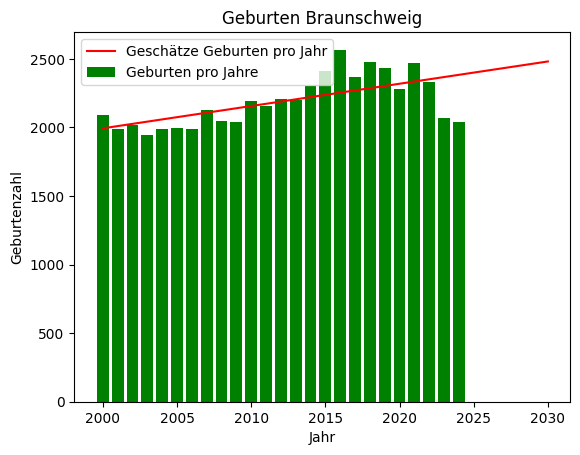

In [74]:
# BEGIN SOLUTION
years = list(geburten_bs.keys())
births = list(geburten_bs.values())
slope, intercept, _, _, stderr = stats.linregress(years, births)

def reg_line(x: float) -> float:
    return float(np.round(slope*x+intercept, decimals=2))

births_2028 = reg_line(2028)
births_2030 = reg_line(2030)

p_2025 = 254867

birth_rate_2028 = births_2028 / p_2025 * 1000

print(births_2030)
print(birth_rate_2028)

# Plot
xs = np.linspace(min(years), 2030, 31)
ys = np.array(
    [reg_line(x) for x in range(2000,2031)]
)

plt.bar(
    years, births,
    label="Geburten pro Jahre",
    color="g"
)

plt.plot(
    xs, ys,
    label="Geschätze Geburten pro Jahr",
    color="r"
)

plt.title("Geburten Braunschweig")
plt.xlabel("Jahr")
plt.ylabel("Geburtenzahl")
plt.legend()

plt.show()

# END SOLUTION

# BEGIN SOLUTION
# END SOLUTION

---

# Verteilungen

## Probability Density Function - Normal Verteilung

### Motivation

Es wurden Daten über die Körperlänge eines Bienenvolkes erhoben, dementsprechend liegen diskrete Werte über die deren Körperlängen vor. Logischerweise repräsentiert dies nur das erhobene Bienenvolk, dieses arbeitet aber kontinuierlich weiter und erzeugt nachkommen. Die Population verändert sich. 

Daher ist anzunehmen, dass auch Werte zwischen den bereits Erhobenen auftreten können. Um dies zu Modellieren wird eine Normalverteilung benötigt.

Schauen wir uns dazu erst die Gaussche Normalverteilung an, diese hat ihren Mittelpunkt bei $x=0$, bezeichnet als Erwartungswert $\mu$, und eine Standardabweichung $\sigma = 1$. Mathematisch ist sie definiert als $$p(x|\mu,\sigma)=\frac{1}{\sqrt(2\pi\sigma^2)}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

SciPy bietet hierfür das `norm` objekt aus dem `stats` Modul an, dieses verlangt die beiden Parameter $\mu$ & $\sigma$, das auf dem `norm` Objekt kann dann die Funktion `pdf` mit einem Paramter als Stepsize oder einem Array aufgerufen werden. Nach Plotten ergibt sich folglich die Normalverteilung (von -4 bis 4):

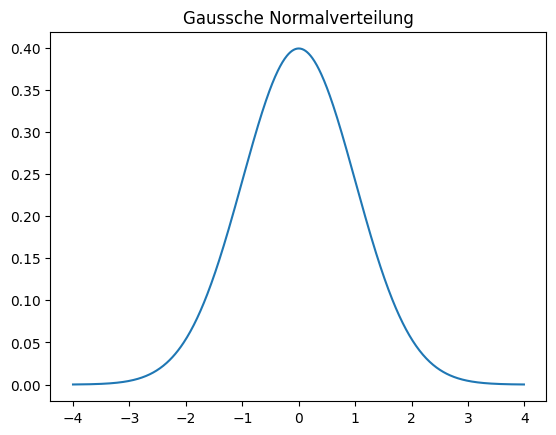

In [42]:
x = np.arange(-4, 4, 0.01) # Plot between -4 and 4 with stepsize 0.01
y = stats.norm(0,1).pdf(x) # Calculate pdf with mu=0, sigma=1

# Plot
plt.title("Gaussche Normalverteilung")
plt.plot(x, y)
plt.show()

Um herauszufinden wie viel Prozent einer Population innerhalb dieser Normalverteilung fallen wird die Funktion `ppf` (Percent Point Function) verwendet.

Am Beispiel 90% der Population:

In [43]:
percentile = stats.norm(0,1).ppf(0.9)
print(f"90% of the Population fall into the range {percentile:0.3f}.")

90% of the Population fall into the range 1.282.


Um dies zu veranschaulichen:

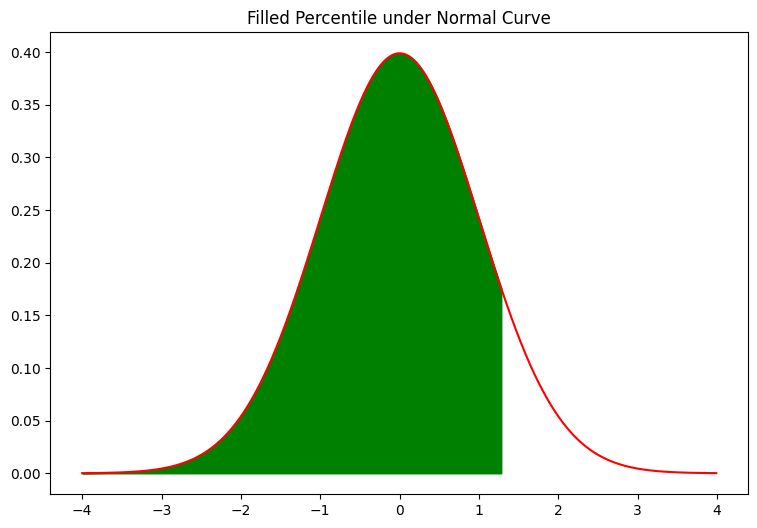

In [13]:
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x,y, color='r')

# filling under the curve
x_fill = np.arange(-4, percentile, 0.01)
y_fill = stats.norm(0,1).pdf(x_fill)
ax.fill_between(x_fill, y_fill, 0, color='g')
plt.title("Filled Percentile under Normal Curve")
plt.show()

Machen wir dies alles am Beispiel der Fuchsrote Lockensandbiene fest. Diese ist laut [Bundesministerium für Ernährung und Landwirtschaft](https://www.bmel.de/DE/themen/landwirtschaft/artenvielfalt/bienen-fuettern/wildbienen-honigbienen-und-co.html) 12-14 mm groß. Daher lässt sich annehmen das die meisten Bienen $\mu=13mm$, mit einer Standardabweichung von $\sigma=1mm$ haben. Wir wollen nun wissen wie groß 95% der Bienen sind, rechnen wir dies mittels `ppf` aus:

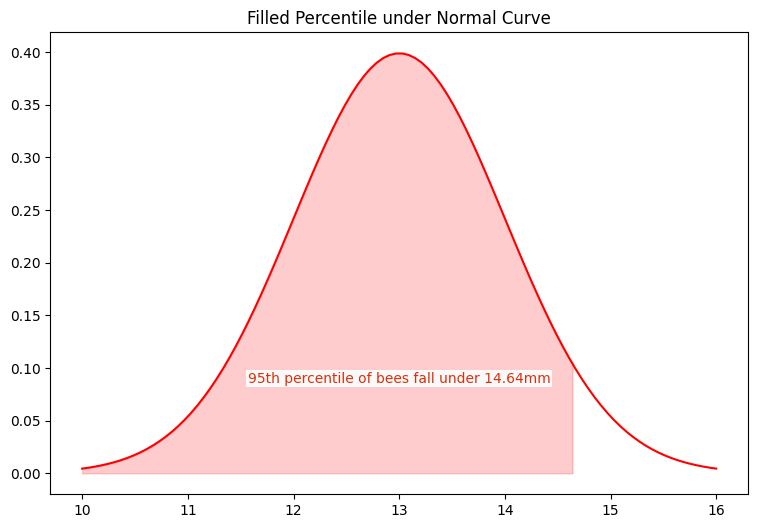

In [14]:
mu = 13 # Mean
sigma = 1 # std deviation in mm

x_norm = np.linspace(10, 16, 100) # Normaldistribution range from 10-16mm 
y_norm = stats.norm(mu, sigma).pdf(x_norm) # Calculate normal

# Height of 95th percentile of bees
percentile = stats.norm(mu,sigma).ppf(0.95)

x_percentile = np.arange(x_norm[0], percentile, 0.01)
y_percentile = stats.norm(mu,sigma).pdf(x_percentile)

# Plot
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x_norm, y_norm, color='r')

# filling under the curve
ax.fill_between(x_percentile, y_percentile, 0, alpha=0.2, color='#FE0000')


# Set text
ax.text(0.5,0.25,
        f"95th percentile of bees fall under {percentile:.2f}mm",
        ha='center', va='center', transform=ax.transAxes,
        bbox={'facecolor':'#fafafa','alpha':1,'edgecolor':'none','pad':1},
        color='#de2e0b'
    )

# Show
plt.title("Filled Percentile under Normal Curve")
plt.show()

### Aufgabe 

*20 Punkte*

Gegeben sind die nach Altersgruppe aufgeschlüsselten Durschnittskörpergrößen (in cm) von Frauen in Deutschland. (Zu finden beim [Statistischen Bundesamt](https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Gesundheit/Gesundheitszustand-Relevantes-Verhalten/Tabellen/koerpermasse-frauen.html))

Gehe wie folgt vor *(8 Punkte)*:

- Berechne das arithmetische Mittel nutze dafür NumPy. und speichere das Ergebnis mit einer Genauigkeit von 1 Dezimalstelle nach dem Komma in der Variablen `avg_height`.
- Gegeben ist auch die Standardabweichung von 15cm, stelle die Normalverteilung mittels `norm.pdf` auf. Speichere den Wert in `norm_height` und finde einen geeigneten linespace zum plotten.
- Berechne folgend die Körpergröße unter die 80% aller Frauen (nach Datenset) fallen. Speichere den Wert in der Variablen `avg_percentile`.
- Plotte das Ergebnis. Orientiere dich gerne an dem Bienenbeispiel. Finde eine geeignete Darstellung. *Tipp: Da die Y-Achse in diesem Beispiel keinen Sinn ergibt kannst du sie einfach austellen mit `plt.yticks([])`*

Markdown Zeile (0 Punkte bei nicht beantworten) *(12 Punkte)*:
- Beschreibe die gegebenen Daten, nutze dazu die verlinkte und weitere Quellen. (Quellenangaben nicht vergessen)
- Beschreibe den resultierenden Plot und setze diesen in Kontext zum Datenset.
- Stelle die Annahmen der Aufgabe in Frage und setze diese in Kontext.
- Beurteile die Aussage aus resultierender Berechnung: "Frauen sind im durchschnitt ungeeignet Basketball zu spielen!"

In [15]:
# Given
avg_height_per_woman = {
    "18 - 20": 167.6,
    "20 - 25": 167.7,
    "25 - 30": 167.3,
    "30 - 35": 167.2,
    "35 - 40": 167.3,
    "40 - 45": 167.5,
    "45 - 50": 167.1,
    "50 - 55": 167.1,
    "55 - 60": 166.9,
    "60 - 65": 165.4,
    "65 - 70": 164.5,
    "70 - 75": 163.9,
    "75+": 162.8
}

avg_height = None
norm_height = None
avg_percentile = None

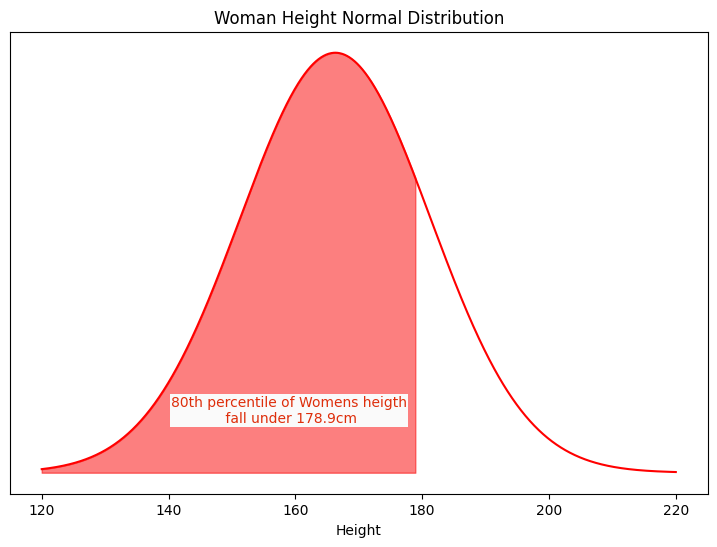

In [16]:
# BEGIN SOLUTION
avg_height = np.round(np.mean(list(avg_height_per_woman.values())), decimals=1)


std_sigma = 15
norm_height = stats.norm(avg_height, std_sigma).pdf(norm_x)
norm_x = np.linspace(120, 220, 1000)
# Height of 80th percentile of woman heights
avg_percentile = stats.norm(avg_height, std_sigma).ppf(0.8)

x_percentile = np.arange(norm_x[0], avg_percentile, 0.01)
y_percentile = stats.norm(avg_height, std_sigma).pdf(x_percentile)

# Plot
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(norm_x, norm_height, color='r')

# filling under the curve
ax.fill_between(x_percentile, y_percentile, 0, alpha=.5, color='#fa0000')


# Set text
ax.text(0.4,0.18,
        f"80th percentile of Womens heigth\n fall under {avg_percentile:.1f}cm",
        ha='center', va='center', transform=ax.transAxes,
        bbox={'facecolor':'#fafafa','alpha':1,'edgecolor':'none','pad':1},
        color='#de2e0b'
    )

# Show
plt.title("Woman Height Normal Distribution")
plt.xlabel("Height")
plt.yticks([]) # hide y
plt.show()
# END SOLUTION

# BEGIN SOLUTION
# END SOLUTION

In [17]:
# Hier werden ihre Lösungen getestet...
import math 

# Check if average height is close to real value
assert math.isclose(avg_height, 166.3, rel_tol=.2) # 1 Punkt

# Check if norm height is close to real value
assert math.isclose(np.round(np.sum(norm_height), decimals=1), 10, rel_tol=.2) # 1 Punkt

# Check if percentile is close to real value
assert math.isclose(avg_percentile, 179, rel_tol=.2) # 1 Punkt